In [2]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
import tables as tb

def merge(a,b):
    final = np.zeros (len(a)+len(b))
    for i in range(len(a)):
        final[2*i]   = a[i]
        final[2*i+1] = b[i]
    return final

def read_keff_h5(file):
    db = tb.open_file(file, mode='r')
    sim_param = db.root.simulation_parameters
    init_param = db.root.initial_depcode_siminfo
    # Keff at t=0 depletion step
    k_0 = np.array([x['keff_bds'][0] for x in sim_param.iterrows()])
    k_0_e = np.array([x['keff_bds'][1] for x in sim_param.iterrows()])
    # Keff at t=end depletion step
    k_1 = np.array([x['keff_eds'][0] for x in sim_param.iterrows()])
    k_1_e = np.array([x['keff_eds'][1] for x in sim_param.iterrows()])
    day_eds = np.array([x['burn_time'] for x in sim_param.iterrows()])
    day_bds = np.zeros_like(day_eds)
    for i in range(1, len(day_eds)):
        day_bds[i] = day_eds[i] - (day_eds[i] - day_eds[i-1])
    db.close()
    return day_bds, day_eds, k_0, k_1, k_0_e, k_1_e

In [43]:
#db_file = '/home/andrei2/Desktop/git/saltproc/develop/saltproc/data/db_saltproc.h5'
db_file = '/home/andrei2/Desktop/git/saltproc/develop/saltproc/data/load_follow.h5'
#db_file_7_5 = '/home/andrei2/Desktop/git/meitner-task-2/saltproc_results/time_step_refinement/5leu_geo_swch/7_5d_840_steps.h5'
t_bds, t_eds, k_bds, k_eds, k_bds_err, k_eds_err = read_keff_h5(db_file)
#days_7_5, k_bds_7_5, k_eds_7_5, k_bds_err_7_5, k_eds_err_7_5, dep_step_7_5 = read_keff_h5(db_file_7_5)
print(len(t_bds), len(t_eds))
print(t_bds[:10], t_eds[:10])

154 154
[0.         0.5        1.         1.5        2.         2.5
 3.         3.5        4.         4.00034714] [0.5        1.         1.5        2.         2.5        3.
 3.5        4.         4.00034714 4.00069427]


In [ ]:
db_file_endf = '/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/data/db/3d_8100d_endf.h5'
days_e, k_bds_e, k_eds_e, k_bds_err_e, k_eds_err_e, dep_step_e = read_keff_h5(db_file_endf)

days2_e = np.linspace(dep_step_e, (len(k_eds_e))*(dep_step_e), num=len(k_eds_e), endpoint=True)
#print(dep_step, days, days2)
#print(k_bds, k_eds)

[0.  0.5 0.5 1.  1.  1.5 1.5 2.  2.  2.5]
[1.03555    1.03363001 1.03631997 1.03350997 1.0352     1.03148997
 1.03672004 1.03356004 1.03653002 1.03164005]


<IPython.core.display.Javascript object>


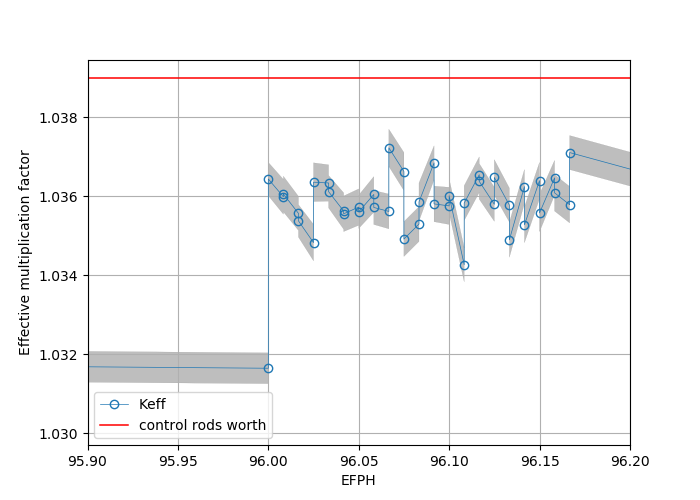

154


In [50]:
#print(len(k_bds), len(k_bds_7_5[:641]))
keff = merge(k_bds, k_eds)
t = merge(t_bds, t_eds)
print(t[:10])
print(keff[:10])
#efpd_e = merge(days_e, days2_e)
err = merge(k_bds_err, k_eds_err)

# Initialize figure
fig_keff_2 = matplotlib.pyplot.figure(2, figsize=[7,5])
ax = fig_keff_2.add_subplot(111)
ax.grid(True)
#ax.plot(t_bds, k_bds, 'o-', label='10%\min rump rate', linewidth=0.5, markerfacecolor="None", markersize=4)
#ax.plot(t_eds, k_eds, 'o-', label='10%\min rump rate', linewidth=0.5, markerfacecolor="None", markersize=4)
ax.plot(t*24, keff, 'o-', label='Keff', linewidth=0.5, markerfacecolor="None")
#ax.plot(efpd_5, keff_5, '-', label='LEU 5%', linewidth=0.5, markerfacecolor="None", alpha=0.8)

ax.fill_between(t*24, keff-err, keff+err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)

ax.axhline(y=1.039, linewidth=1.1, color='r', label='control rods worth')
#ax.legend(loc=0)
ax.set_ylabel('Effective multiplication factor')
ax.set_xlabel('EFPH')
#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')
#ax.set_xlim(0,max(days2))
#ax.set_ylim([0.75, 1.018])

ax.set_xlim(95.9, 96.2)
#ax.set_ylim(0.999, 1.04)
# zoomed 1
#ax.set_xlim(3.99, 4.02)
#ax.set_ylim(.999, 1.04)

ax.legend(loc=0)

fig_keff_2.show()
#fig_keff_2.savefig('/home/andrei2/Desktop/keff_3.png',bbox_inches='tight', dpi=900)
#fig_keff_2.savefig('/home/andrei2/Desktop/git/job-apps/nlabs/pres/ornl-online-repr/images/keff_tap_var_geo.png',bbox_inches='tight', dpi=900)
#print(keff[-700:-620])
#print(days_e, len(days_e))
print(len(k_bds))

In [ ]:
indx = []
for i in range(len(keff)):
    if keff[i]-keff[i-1] > 0.03:
        indx.append(efpd[i])
        print(i, keff[i], efpd[i], (keff[i]-keff[i-1])*1e5)
print(indx)
print("Months between moderator rods re-configurations ", (np.diff(indx)/30))
print("Average months between moderator rods re-configurations ", (np.mean(np.diff(indx)/30)))